#Business Understanding
The dataset is a collection of URLs followed by various attributes of the website and of the url itself. Each URL is assigned a Label that indicates whether the link is a phishing or legitimate site. The dataset was gathered to study and detect phishing websites. Phishing is one of the most prominent hacking methods used commonly. The method has been proven to evade human intuition and work on even the most vigilant victims. Phishing victims are subject to financial loss and reputational damages depending on the motive of the bad actors. This creates plenty of motivation for organizations to effectively detect and block potential phishing URLs before users even have an opportunity to click on them. In our particular dataset, we use the "label" attribute to determine if a URL is a legitimate or phishing link. (1 = Legitimate and 0 = Phish Link) If phishing and legitimate URLSs show different patterns, then the dataset provides useful knowledge for our prediction model. Attributes such as HasCopyrightInfo and HasSocialNet indicate some correlation with classifying as a legitimate link, inversely SpecialCharRatioinURL has correlation with phishing links. These attribute displaying correlation towards a specific label gives us confidence that the data collected is "useful". A prediction model for capturing phishing links should prioritize detecting as many phishing URLs as possible, even at the expense of more flagging legitimate links. In practice, it is imperative to detect phishing links because these are the methods that could potentially be exploited and flagging legitimate links have much smaller consequences. 

##Data Understanding
###Attribute Meaning and Data Type

##Identification and Text (Characters)
FILENAME
- ID of the origianl Text file or record for the URL

URL
- Full Website Address

Domain
- Main domain part of the URL

TLD
- Top-Level Domain

Title
- Page Title

##Lengths (Numeric)
URLLength
- Number of char in the full URL

DomainLength
- Number of char in domain

TLDLength
- Number of char in the TLD
  
NoOfSubDomain
- Count of subdomain in the URL

NoOfObfuscatedChar
- Count of obfuscated char

NoOfLettersInURL
- Count of letters in the URL (a-z,A-Z)

NoOfDegitsInRUL
- Digit Count in URL
- 
NoOfEqualsInURL/NoOfQMarkInURL/NoOfAmpersandInURL/NoOfOtherSpecialCharsInURL
- Counts of types of special char in the URL

LineOfCode
- Totalnumber of lines of HTML code on the page

LargestLineLength
- Length of longest line of HTML

NoOfURLRedirct/NoOfSelfRedirect
-Number of URL redirects and redirects to the same domain

NoOfPopup/NoOfiFrame
- Number of popups and iFrames

NoOfImage/NoOfCSS/NoOfJS
- Count of images, CSS files, and JS Files
- 

NoOfSelfRef/NoOfEmptyRef/NoOfExternalRef
- Number of links on page (internal,empty,external)


##Ratios,Probabilities, and Similarity Scores ("Oh My") (Numeric/Floating Point)
URLSimilarityIndex
- Similarity Score between URL and Index Reference

CharContinuationRate
- Rate at which char repeat patterns (Randomness)
  
TLDLegitimateProb
- Probability that TLD is associated with legitimate sites

URLCharProb
- Probability score based on char distribution in URL
  
ObfuscationRatio
- Proportion of obfuscated char relative to length of URL
  
LetterRatioInURL/DegitRatioInURL
-Char and Num ratio relative to URL Length

SpacialCharRatioInURL
- Ratio of special char in URL

DomainTitleMatchScore/URLTitleMatchScore
- Similarity scores between domain or URL Text and the page title

##Binary Flag (Numeric 1 or 0)
IsDomainIP
- 1 = If the domain is an IP addr
  
HasObfuscation
- 1= URL has obfuscation patterns

IsHTTPS  
- 1 = The url uses HTTPS

HasTitle  
- 1 = The page has a non-empty HTML Title

HasFavicon  
- 1 = Site has a favicon

Robots
- 1 = a robot.txt file is present

IsResponsive
- 1 = The site is responsivle (Adaptive)

HasDescription
- 1 = Page has a meta description

HasExternalFormSubmit
- 1= If a form submits to an external domain


HasSocialNet
- 1 = Social Media links are present

HasSubmitButton/HasHiddenFields/HasPasswordField  
- 1 = Presence of submit buttons, hidden forms and password fields
  
Bank/Pay/Crypto  
- 1 = Page is related to financial topics

HasCopyrightInf
- 1 = Copyright info is present

#Target (Binary 1/0)
label 
- 1 = Legitimate Website

In [ ]:
#Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Importing Dataset and quick head view and dimension check (235795, 56)
import pandas as pd
from IPython.display import display

df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

display(df.head())
display(df.shape)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


(235795, 56)

In [13]:
#Viewing all Features/Attributes
df.info()
df.describe()
df['label'].value_counts()
df['label'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

label
1    0.571895
0    0.428105
Name: proportion, dtype: float64

#Data Quality TExt bleh bleh bleh

In [42]:
#Data Quality
##Missing Data
### There are no missing values in this dataset

###PreCleaned)
print("Shape")
display(df.shape)

###Empty Row Count
print("Empty Row Count")
empty_rows = df.isna().all(axis=1)
display(empty_rows.sum())
display(df.isna().sum())

##Duplicates
###Duplicate Rows
print("Duplicate Row")
display(df.duplicated().sum())

###Duplicate URLs (425) 
### Some reason each urllength is increased by 1. and other values are off by a miniscule. It is safe to just drop all dupes
display(df.duplicated(subset=["URL"]).sum())

dup_url_mask = df.duplicated(subset=["URL"], keep=False)
dup_groups = df[dup_url_mask].sort_values("URL")

dup_groups.head(20)

df_dedup = df.drop_duplicates(subset=["URL"], keep="first")

print("Post De-Dup")
df_dedup.shape


Shape


(235795, 56)

Empty Row Count


np.int64(0)

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

Duplicate Row


np.int64(0)

np.int64(425)

Post De-Dup


(235370, 56)

#Summary Stats of Important Variables
IsHTTPS
HasDescription
HasSocialNet
URLLength
NoOfObfuscatedChar
LineOfCode
NoOfExternalRef
CharContinuationRate


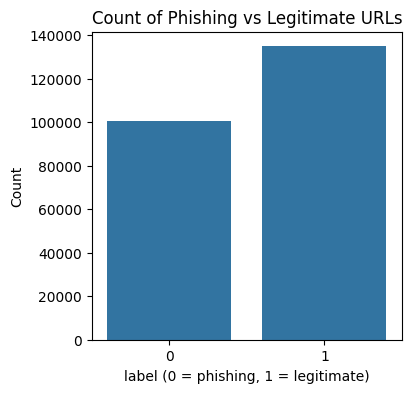

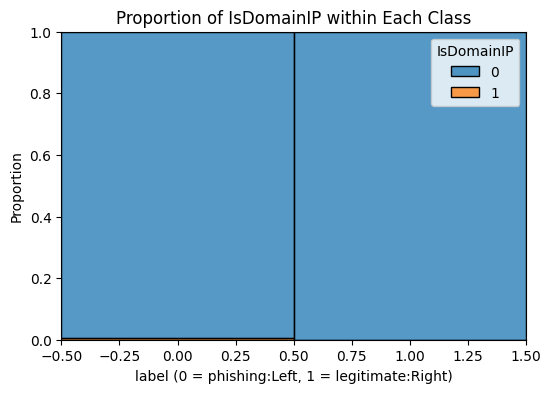

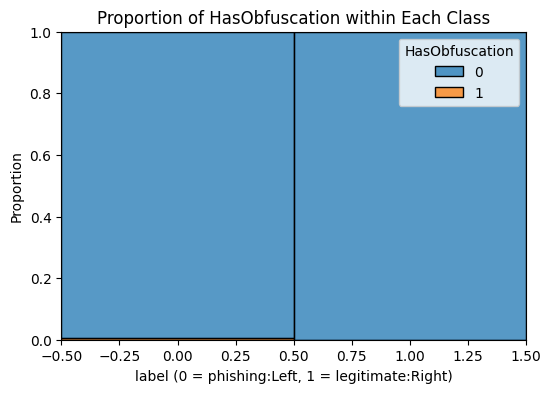

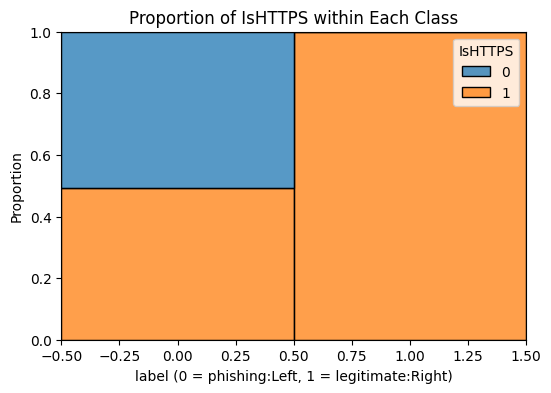

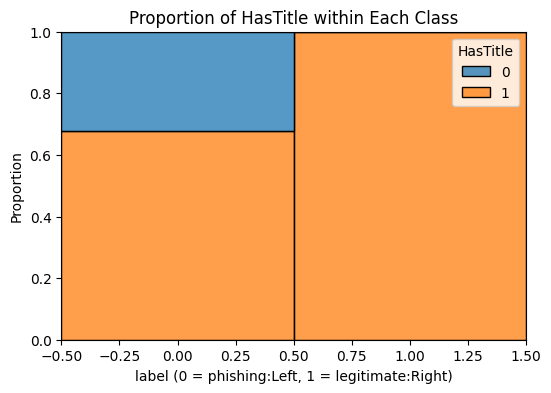

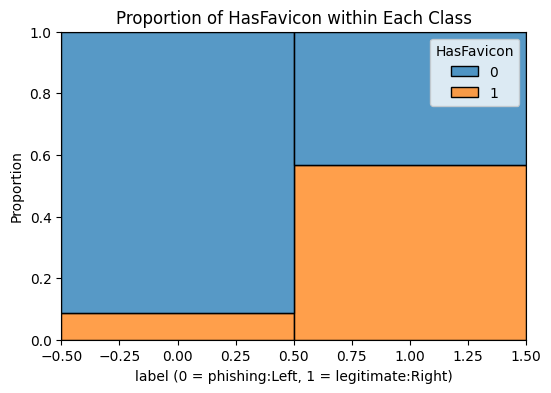

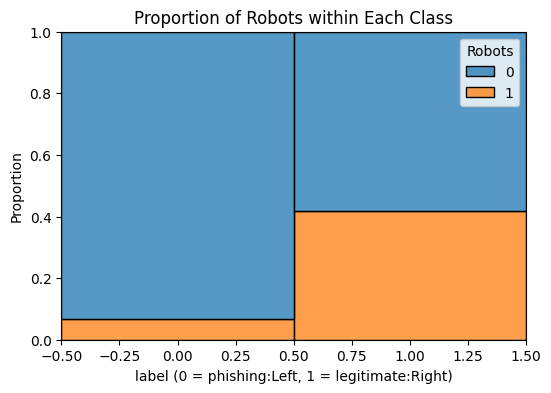

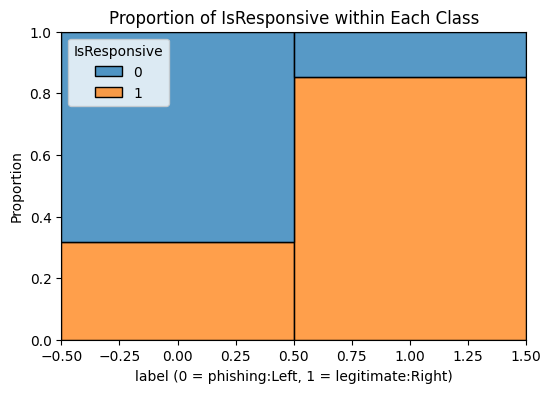

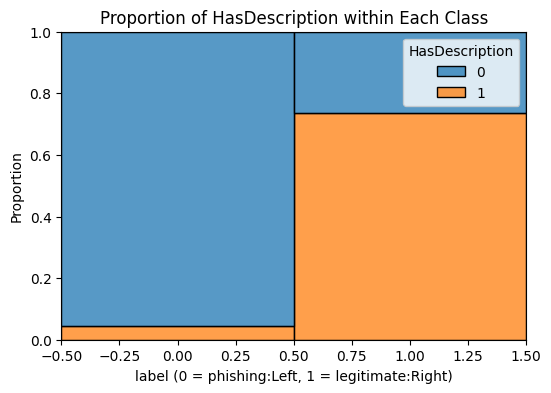

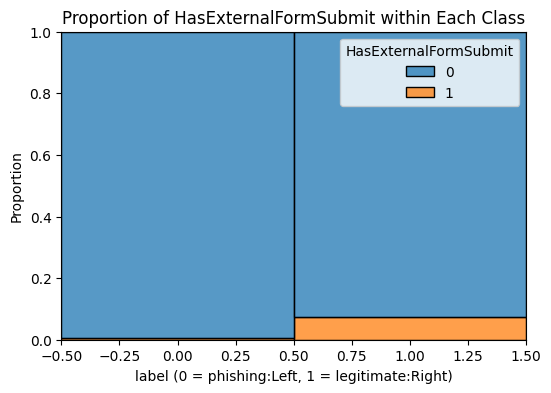

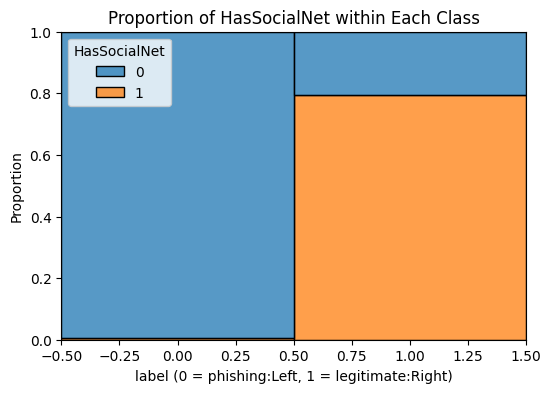

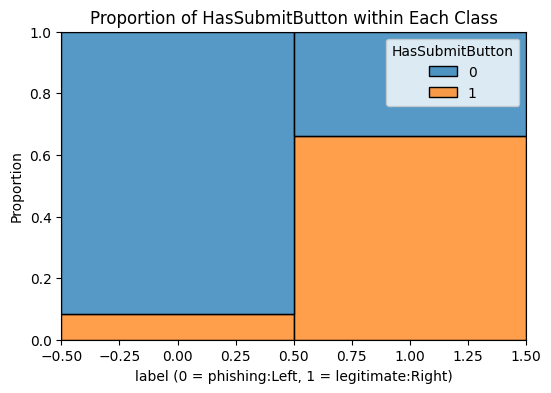

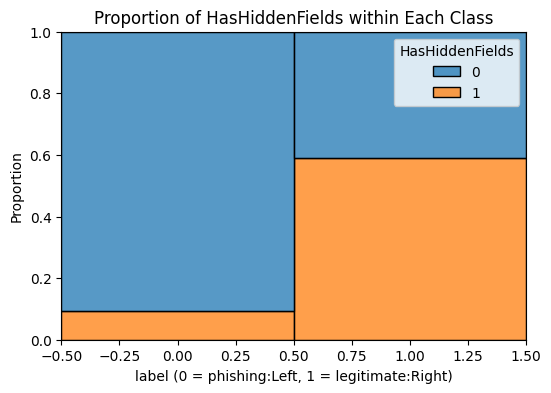

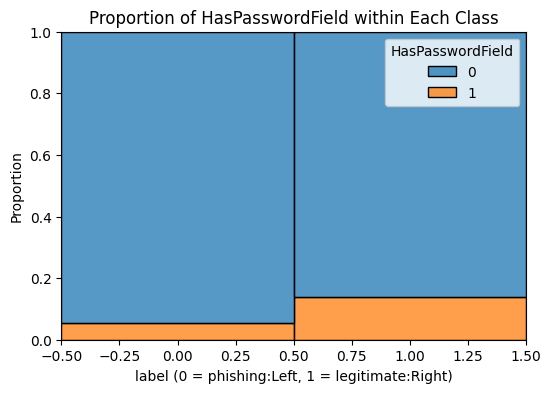

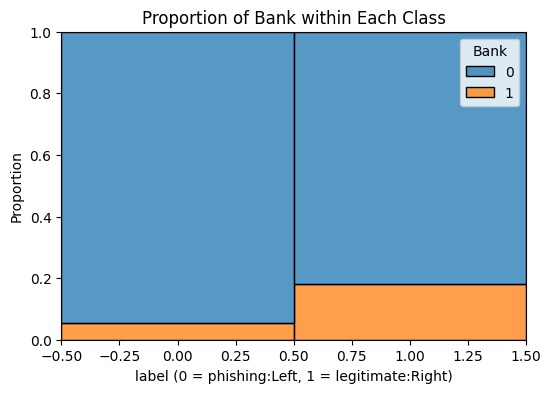

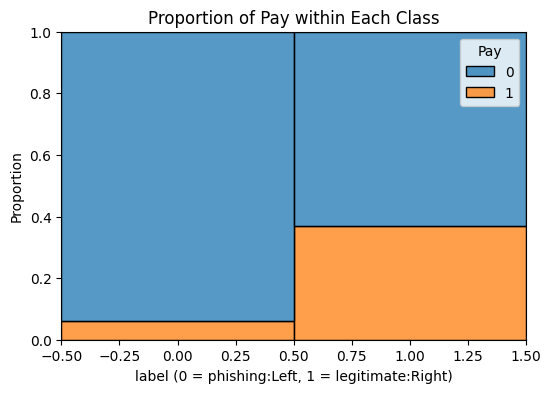

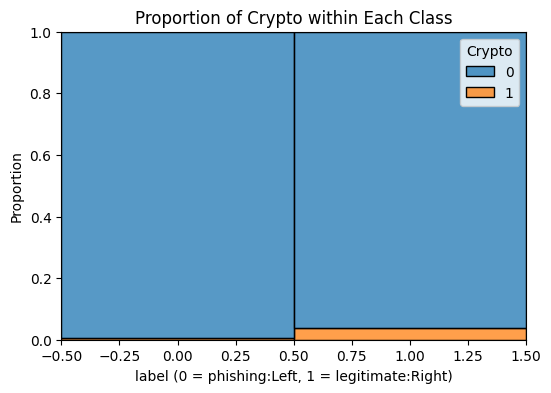

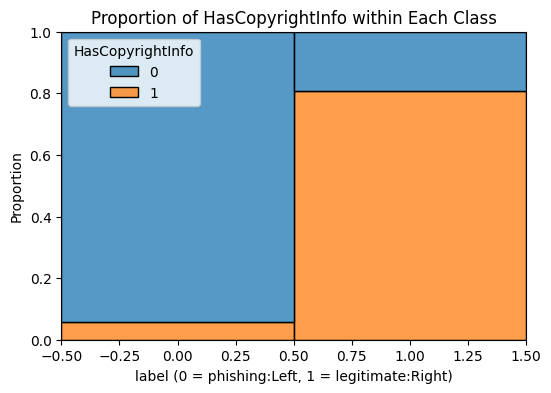

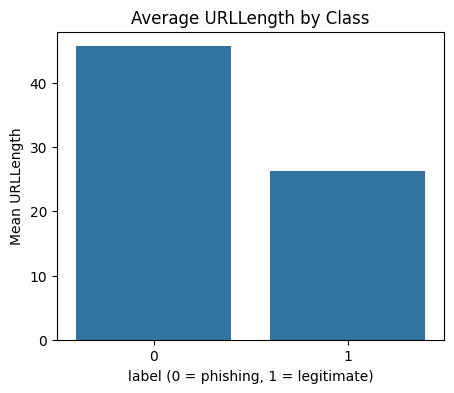

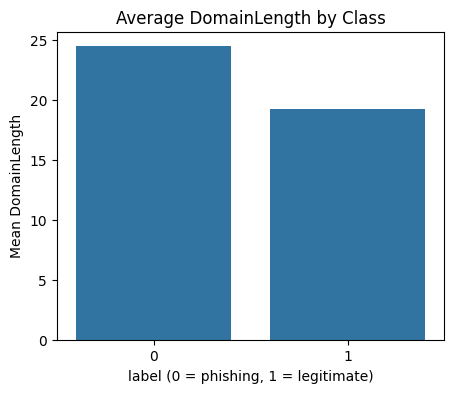

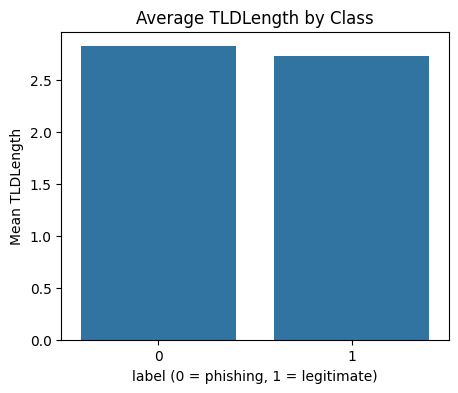

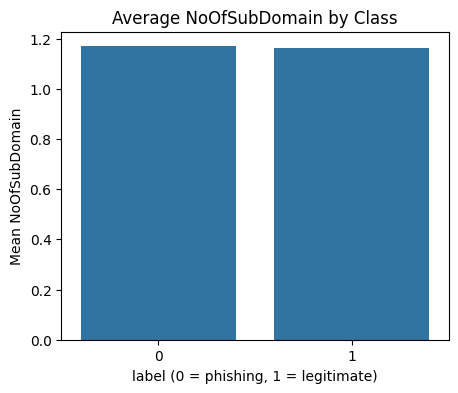

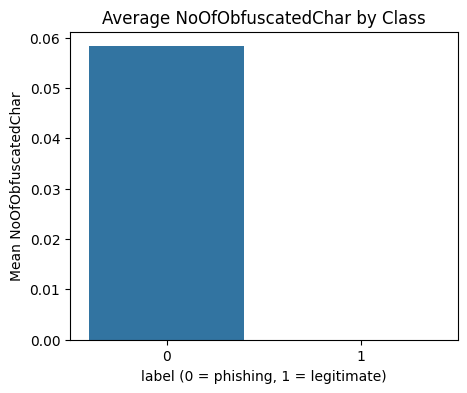

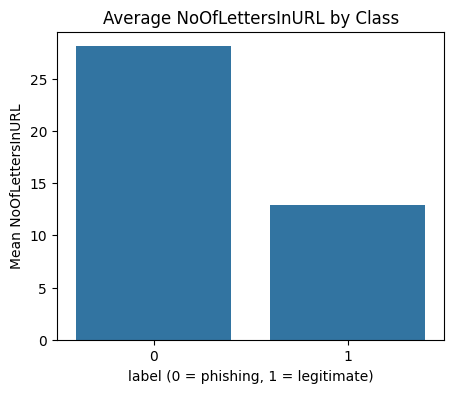

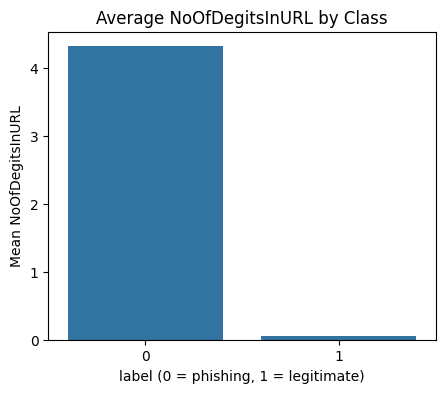

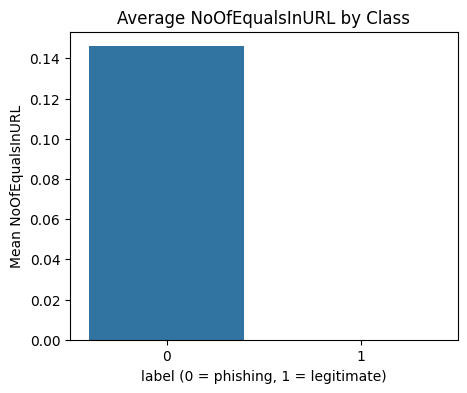

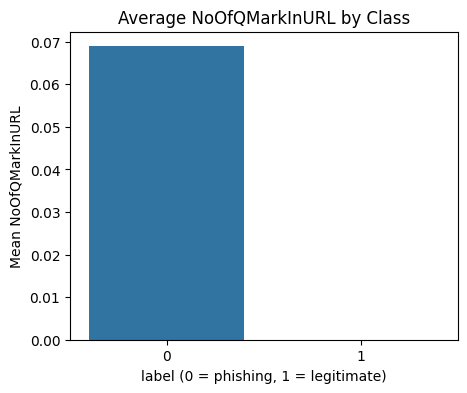

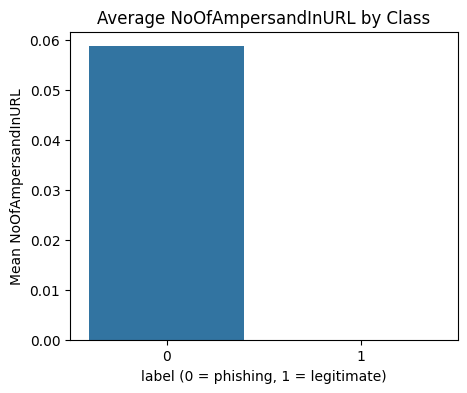

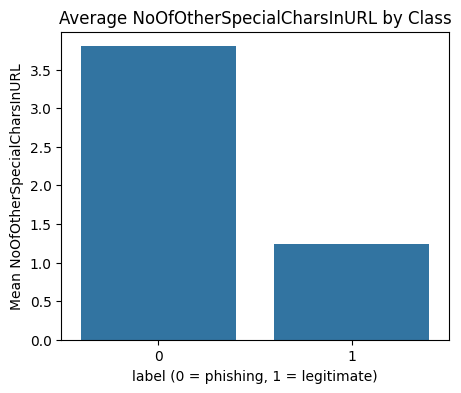

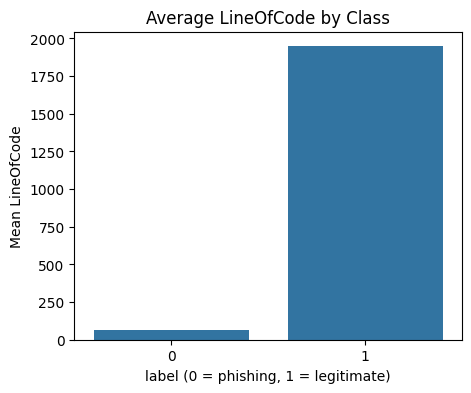

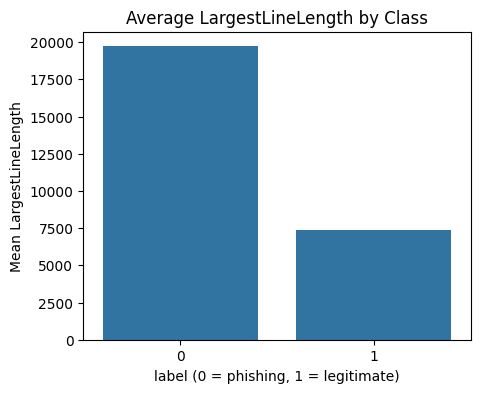

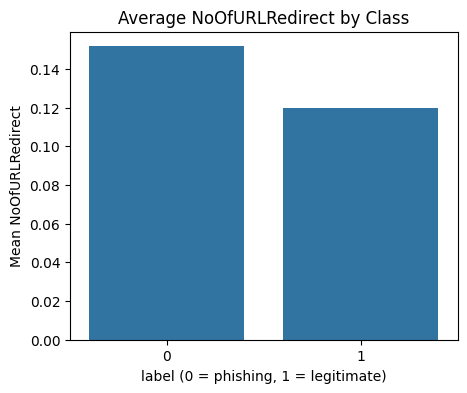

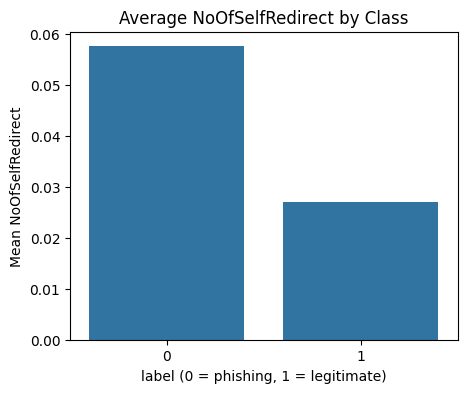

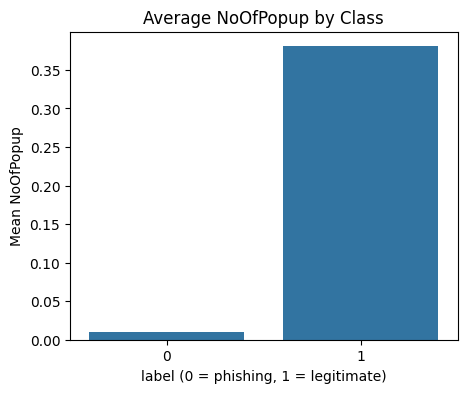

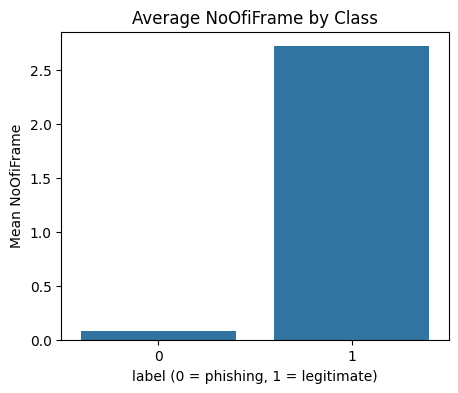

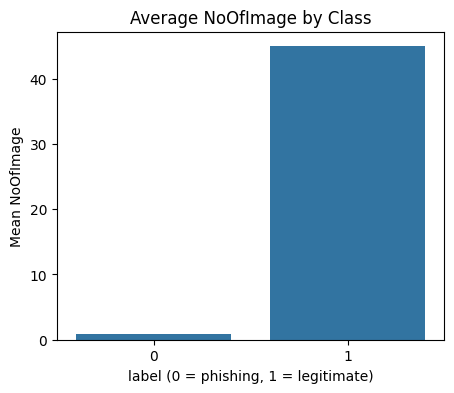

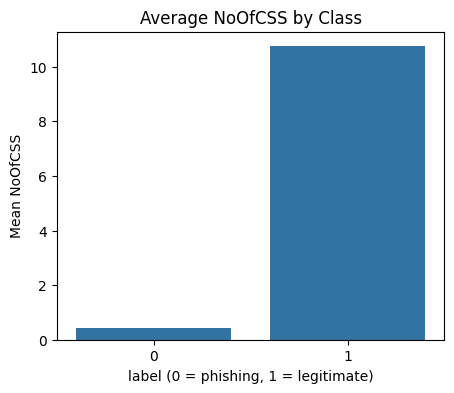

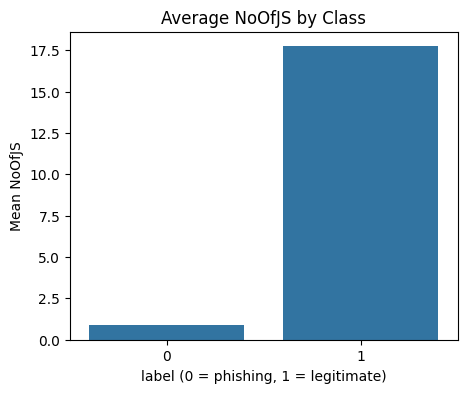

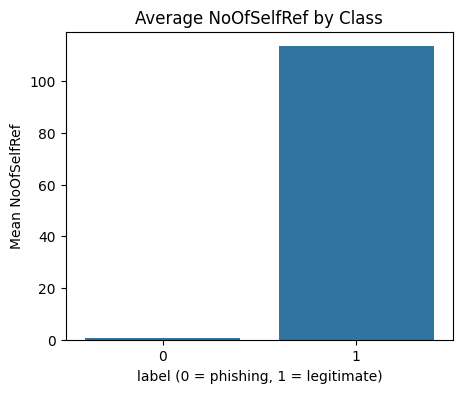

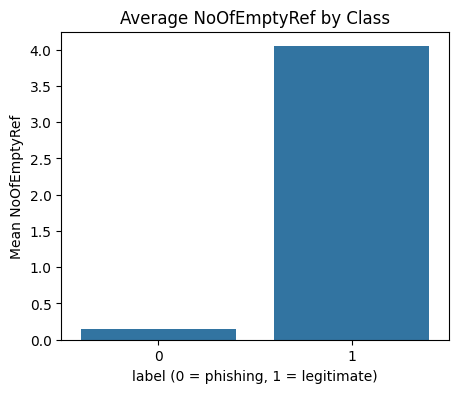

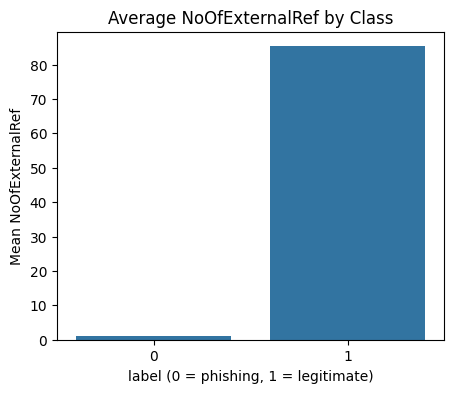

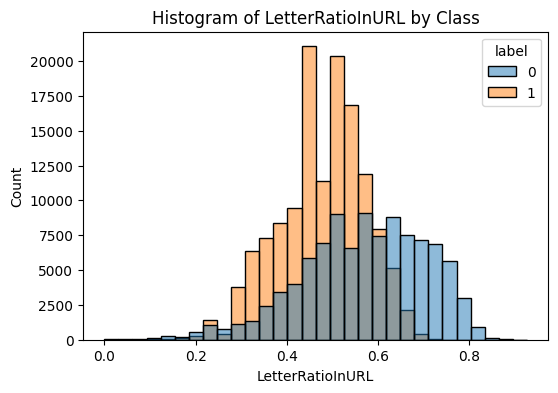

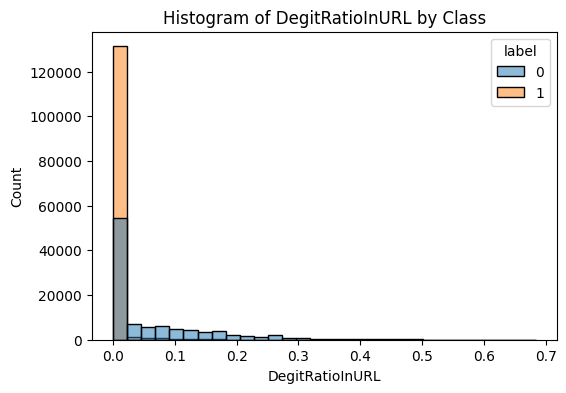

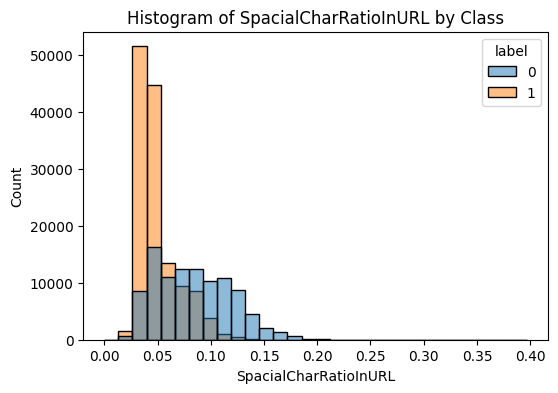

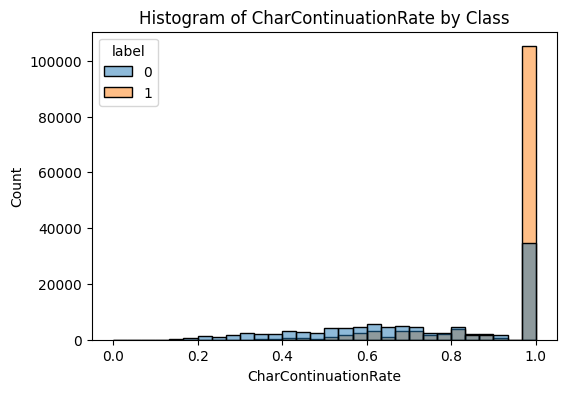

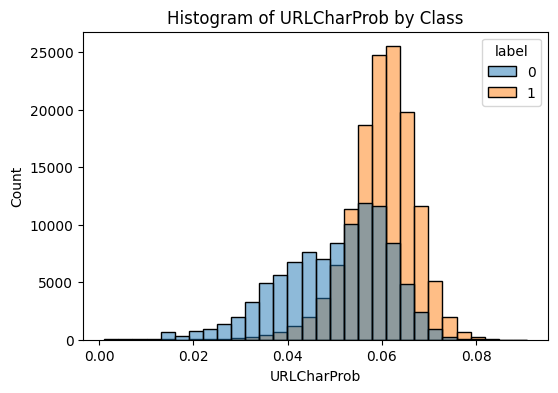

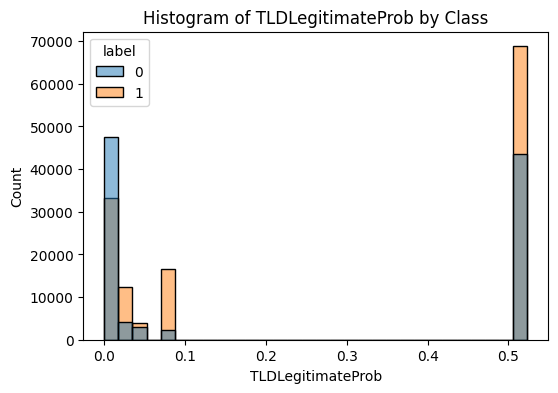

In [58]:
#Quick Charts to see data  Phishing vs. Legitimate

#Bar Chart Phish vs. Legitimate
plt.figure(figsize=(4, 4))
sns.countplot(x="label", data=df_dedup)
plt.title("Count of Phishing vs Legitimate URLs")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("Count")
plt.show()

#Bar Chart for Binary Features Ratios
for col in ["IsDomainIP","HasObfuscation", "IsHTTPS", "HasTitle", 
            "HasFavicon", "Robots", "IsResponsive", "HasDescription", 
            "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton", 
            "HasHiddenFields", "HasPasswordField", "Bank", "Pay", "Crypto", "HasCopyrightInfo"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_dedup, x="label", hue=col,
                 multiple="fill", discrete=True)
    plt.title(f"Proportion of {col} within Each Class")
    plt.xlabel("label (0 = phishing:Left, 1 = legitimate:Right)")
    plt.ylabel("Proportion")
    plt.show()

#BarChart for Class(Num Counts)
num_features = ["URLLength", "DomainLength", "TLDLength", "NoOfSubDomain", "NoOfObfuscatedChar",
                "NoOfLettersInURL", "NoOfDegitsInURL", "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL",
                "NoOfOtherSpecialCharsInURL", "LineOfCode", "LargestLineLength", "NoOfURLRedirect", "NoOfSelfRedirect",
                "NoOfPopup", "NoOfiFrame", "NoOfImage", "NoOfCSS", "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef"]

for col in num_features:
    agg = df_dedup.groupby("label")[col].mean().reset_index()
    plt.figure(figsize=(5, 4))
    sns.barplot(data=agg, x="label", y=col)
    plt.title(f"Average {col} by Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel(f"Mean {col}")
    plt.show()


#Histograms for Ratios and Scores
char_cols = ["LetterRatioInURL", "DegitRatioInURL", "SpacialCharRatioInURL",
             "CharContinuationRate", "URLCharProb", "TLDLegitimateProb"]

for col in char_cols:
    if col in df_dedup.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(
            data=df_dedup,
            x=col,
            hue="label",          # 0 = phishing, 1 = legitimate
            bins=30,
            multiple="layer",     # try "stack" or "dodge" or "fill" too
            kde=False,
            alpha=0.5             # make overlaps easier to see
        )
        plt.title(f"Histogram of {col} by Class")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()



In [70]:
#Summary Stats on Important Features

impfea = [
    "IsHTTPS",
    "HasDescription",
    "HasSocialNet",
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

impfea = [c for c in impfea if c in df.columns]

summary_rows = []

for col in impfea:
    desc = df[col].describe()
    col_min = desc["min"]
    col_q1 = desc["25%"]
    col_median = desc["50%"]
    col_mean = desc["mean"]
    col_q3 = desc["75%"]
    col_max = desc["max"]
    col_std = desc["std"]
    col_count = desc["count"]

    col_var = df[col].var()
    mode_series = df[col].mode()
    col_mode = mode_series.iloc[0] if not mode_series.empty else None
    col_range = col_max - col_min

    summary_rows.append({
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_df = pd.DataFrame(summary_rows).set_index("feature")
print(summary_df)

for cls, subdf in df.groupby("label"):
    for col in impfea:
        desc = subdf[col].describe()
        col_min = desc["min"]
        col_q1 = desc["25%"]
        col_median = desc["50%"]
        col_mean = desc["mean"]
        col_q3 = desc["75%"]
        col_max = desc["max"]
        col_std = desc["std"]
        col_count = desc["count"]
        
        col_var = subdf[col].var()
        mode_series = subdf[col].mode()
        col_mode = mode_series.iloc[0] if not mode_series.empty else None
        col_range = col_max - col_min

        summary_rows.append({
        "label": cls,
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_by_label = pd.DataFrame(summary_rows).set_index(["feature", "label"])
print(summary_by_label)

                         count   min     q1  median         mean      q3  \
feature                                                                    
IsHTTPS               235795.0   0.0   1.00     1.0     0.782625     1.0   
HasDescription        235795.0   0.0   0.00     0.0     0.440183     1.0   
HasSocialNet          235795.0   0.0   0.00     0.0     0.456570     1.0   
URLLength             235795.0  13.0  23.00    27.0    34.573095    34.0   
NoOfObfuscatedChar    235795.0   0.0   0.00     0.0     0.024861     0.0   
LineOfCode            235795.0   2.0  18.00   429.0  1141.900443  1277.0   
NoOfExternalRef       235795.0   0.0   1.00    10.0    49.262516    57.0   
CharContinuationRate  235795.0   0.0   0.68     1.0     0.845508     1.0   

                           max     range          std           var  mode  
feature                                                                    
IsHTTPS                    1.0       1.0     0.412461  1.701240e-01   1.0  
HasDescript

#Visualizaton of Important features <May duplicate some earlier plots>
IsHTTPS
HasDescription
HasSocialNet
URLLength
NoOfObfuscatedChar
LineOfCode
NoOfExternalRef
CharContinuationRate



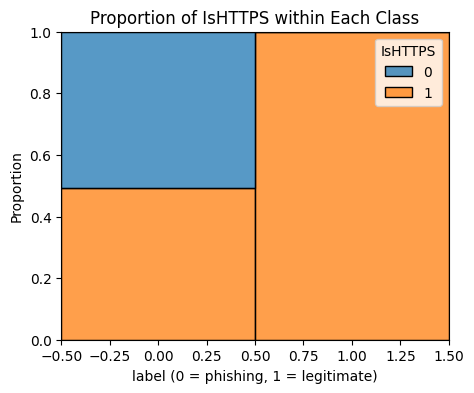

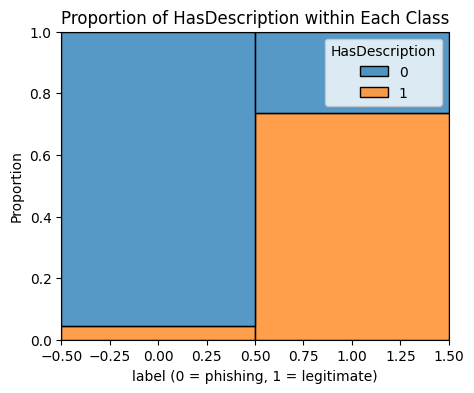

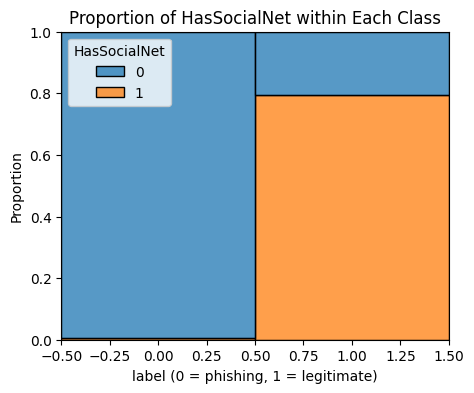

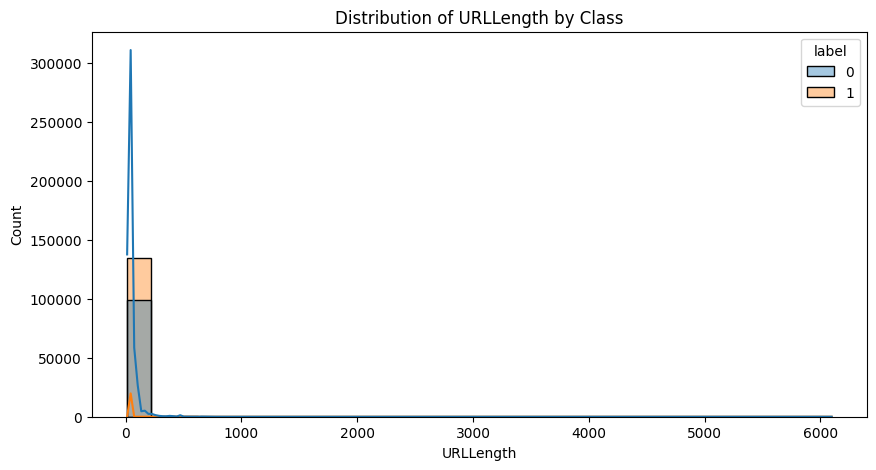

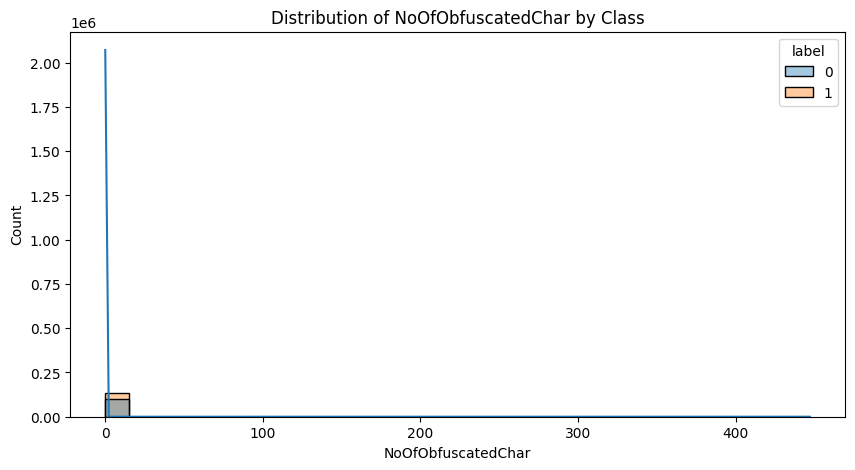

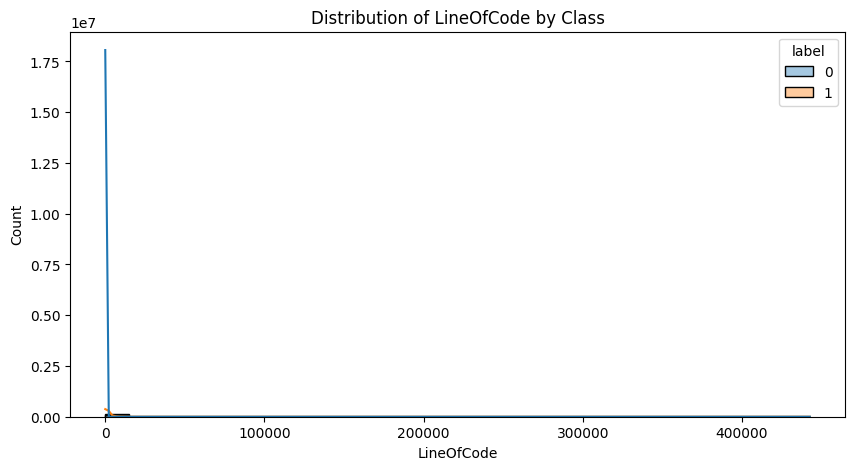

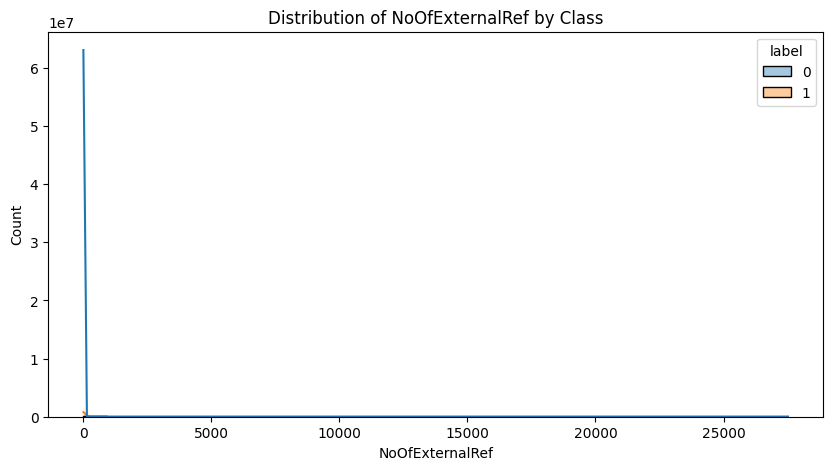

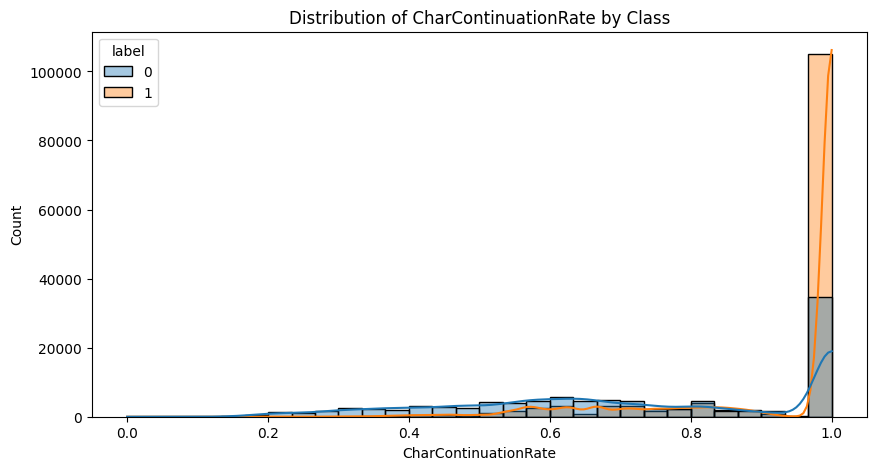

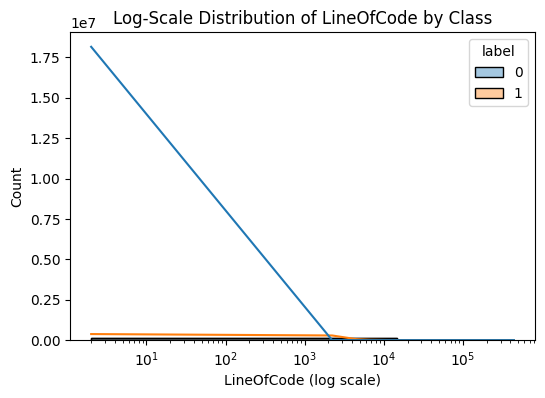

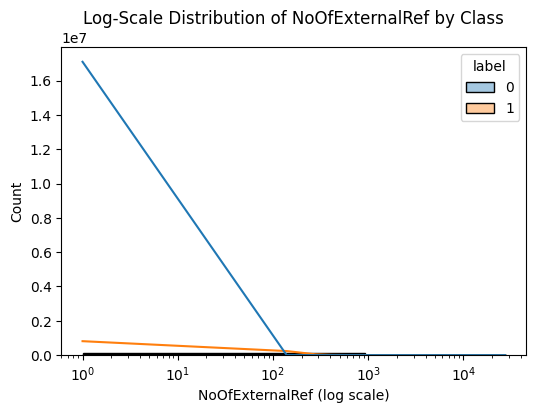

In [86]:
#Visualizations
##Binary
bin_cols = [c for c in ["IsHTTPS","HasDescription","HasSocialNet"] if c in df_dedup.columns]

for col in bin_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(
        data=df_dedup,
        x="label",
        hue=col,
        multiple="fill",
        discrete=True
    )
    plt.title(f"Proportion of {col} within Each Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel("Proportion")
    plt.show()

##Numerical 
num_cols = [
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(
        data=df_dedup,
        x=col,
        hue="label",
        bins=30,
        kde=True,
        alpha=0.4
    )
    plt.title(f"Distribution of {col} by Class")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



#Relationship between Attributes


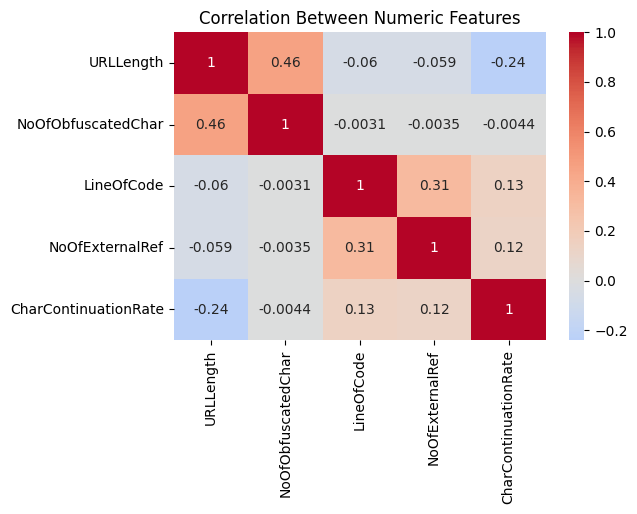

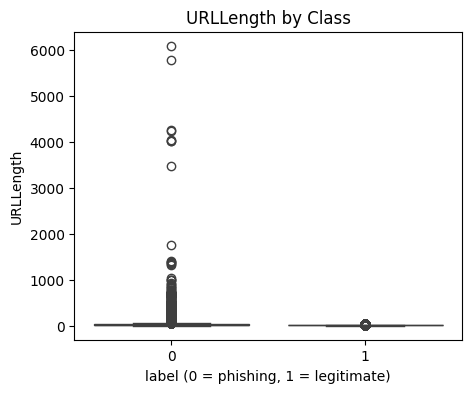

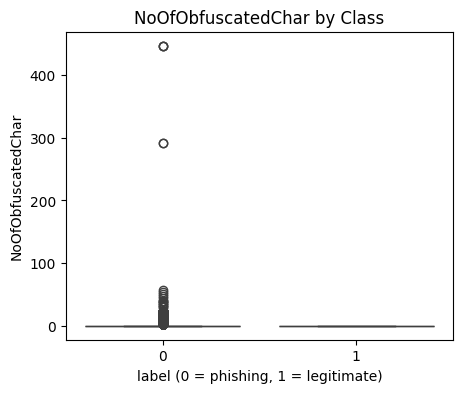

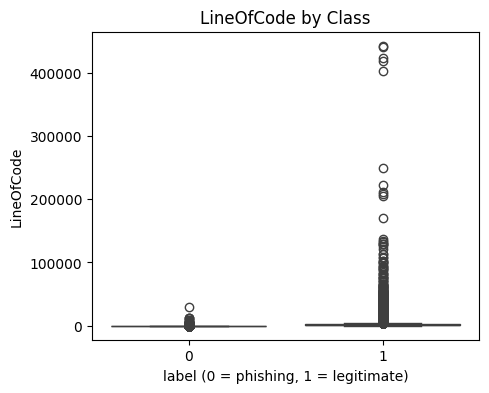

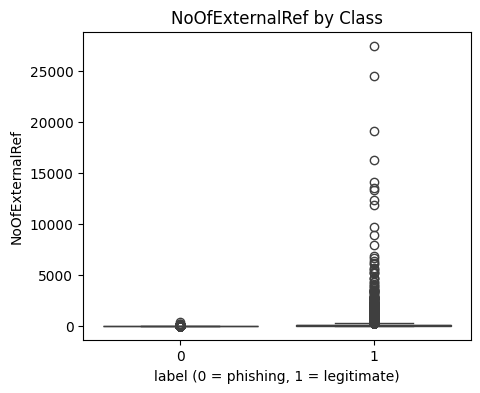

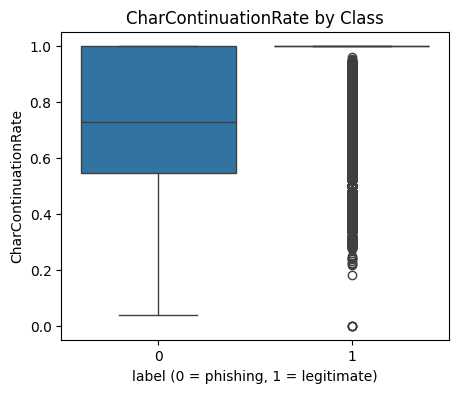

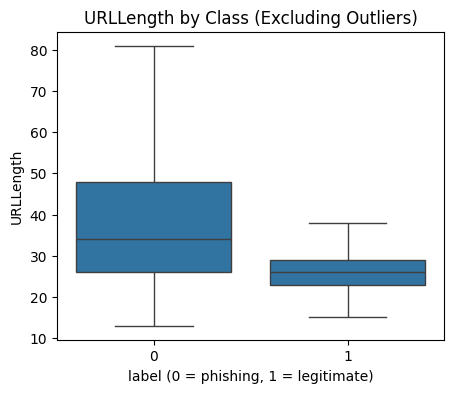

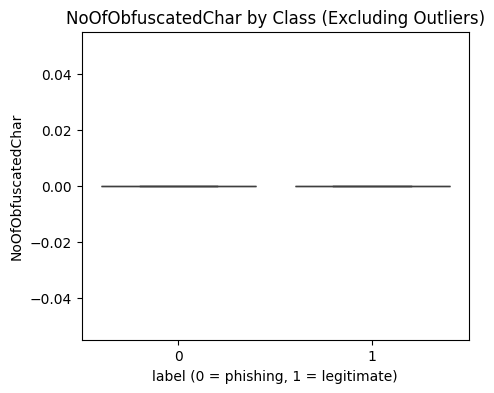

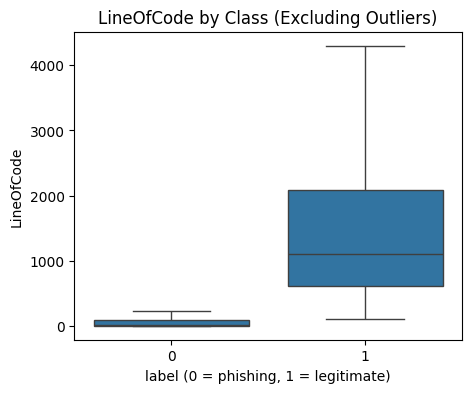

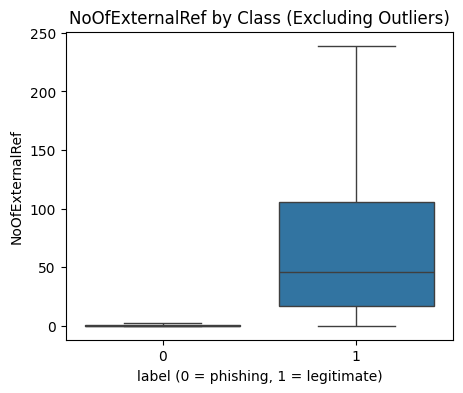

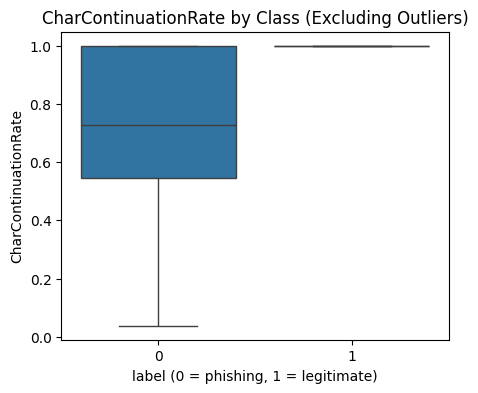

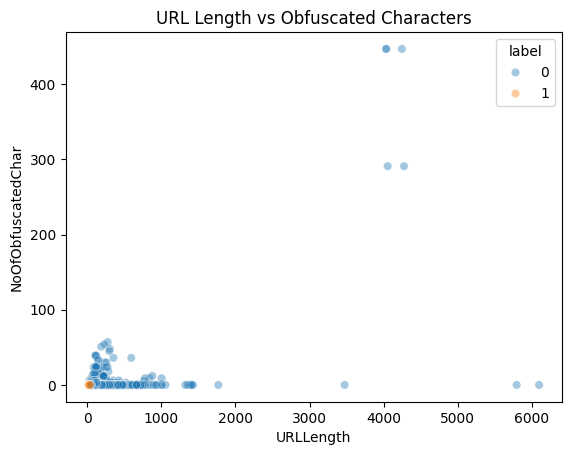

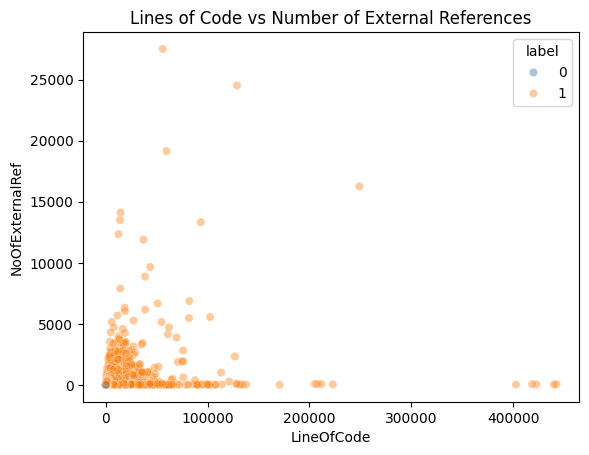

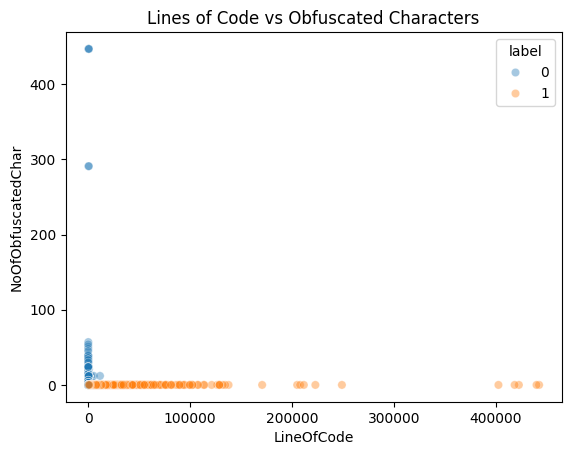

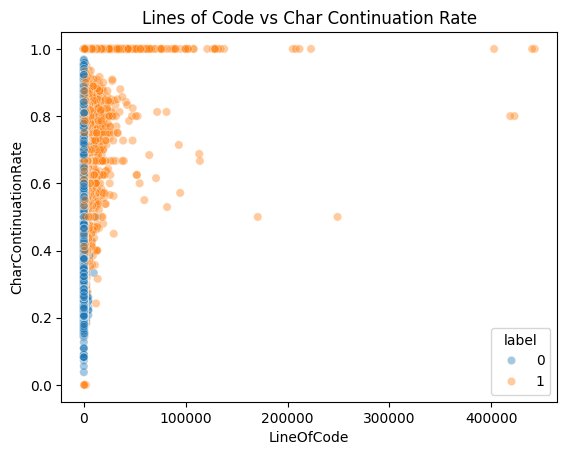

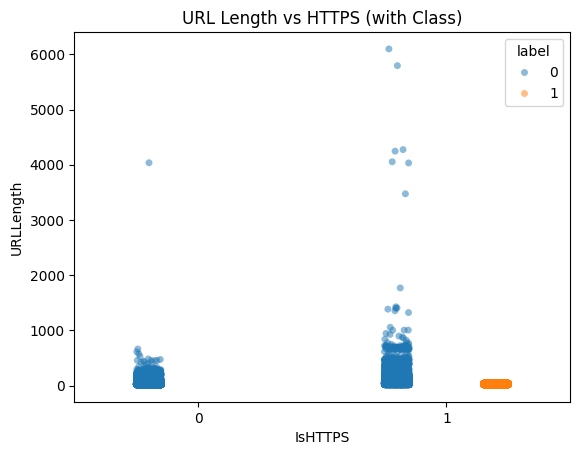

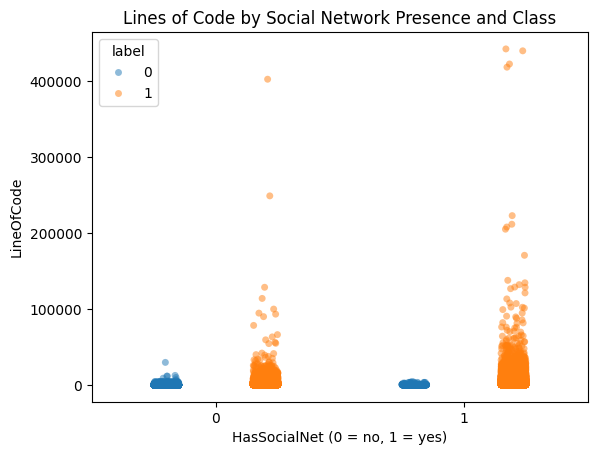

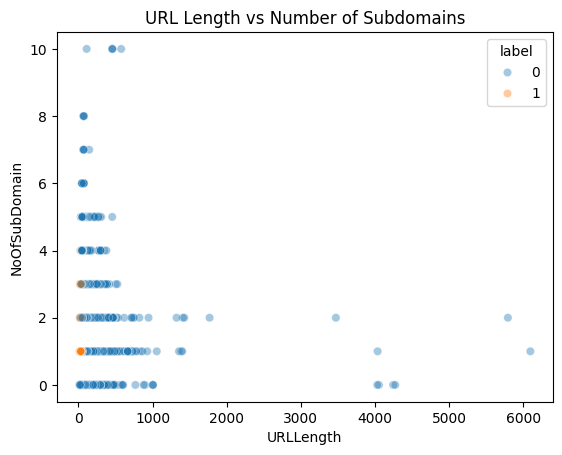

In [103]:
#Relationships
#CorrPlot
plt.figure(figsize=(6,4))
corr = df_dedup[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Numeric Features")
plt.show()

#BoxPlots (Outlers vs. OutlierExclusion)
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df, 
                x="label", 
                y=col
               )
    plt.title(f"{col} by Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_dedup, 
                x="label", 
                y=col,
                showfliers=False
               )
    plt.title(f"{col} by Class (Excluding Outliers)")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="label", y="NoOfImage", showfliers=False)
plt.title("Number of Images by Class")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("NoOfImg")
plt.show()

#ScatterPlots
## URL Len vs. Obfu Char
sns.scatterplot(
    data=df,
    x="URLLength",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Obfuscated Characters")
plt.show()

##Lines of Code vs. Externel Ref.
sns.scatterplot(
    data=df,
    x="LineOfCode",
    y="NoOfExternalRef",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Number of External References")
plt.show()

##Lines of Code vs. Obfuschar
sns.scatterplot(
    data=df,
    x="LineOfCode",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Obfuscated Characters")
plt.show()

##Char Cont Rate vs. LOC
sns.scatterplot(
    data=df,
    x="LineOfCode",
    y="CharContinuationRate",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Char Continuation Rate")
plt.show()

#Popups vs Images
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="NoOfPopup",
    y="NoOfImage",
    hue="label",
    alpha=0.5
)
plt.title("Popups vs Images by Class")
plt.xlabel("NoOfPopup")
plt.ylabel("NoOfImg")
plt.show()

#Strip Plot 
##HTTPS vs. URLLength
sns.stripplot(
    data=df,
    x="IsHTTPS",
    y="URLLength",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("URL Length vs HTTPS (with Class)")
plt.show()

##HasSocialNet vs Line of Code
sns.stripplot(
    data=df,
    x="HasSocialNet",
    y="LineOfCode",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("Lines of Code by Social Network Presence and Class")
plt.xlabel("HasSocialNet (0 = no, 1 = yes)")
plt.show()

sns.scatterplot(
    data=df,
    x="URLLength",
    y="NoOfSubDomain",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Number of Subdomains")
plt.show()

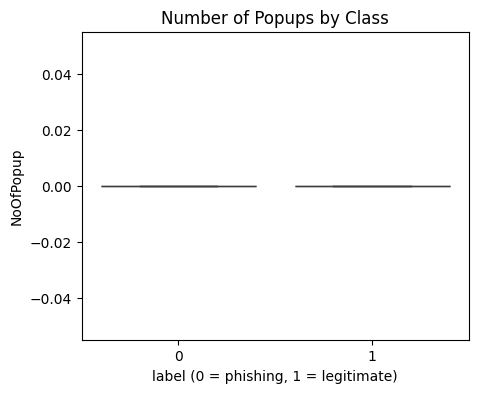

In [115]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="label", y="NoOfPopup", showfliers=False)
plt.title("Number of Popups by Class")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("NoOfPopup")
plt.show()



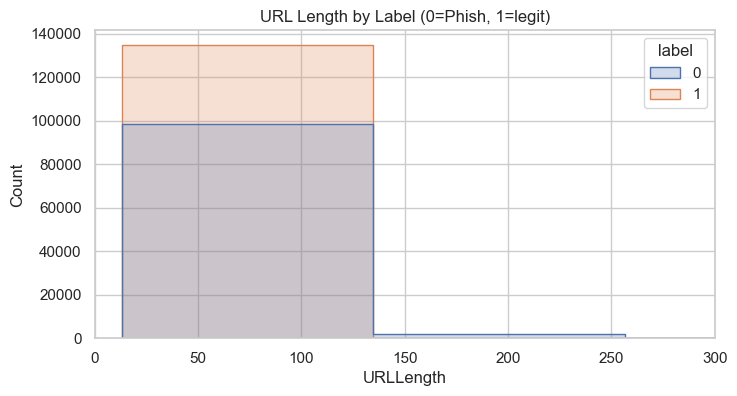

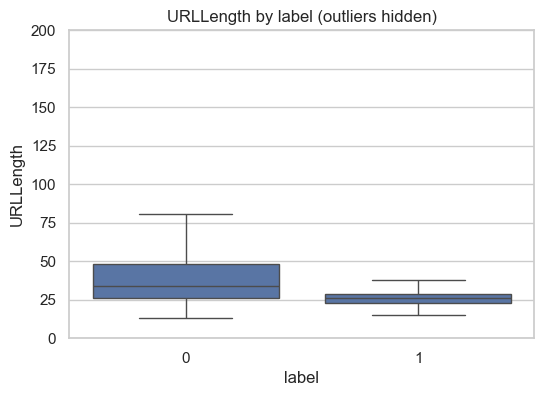

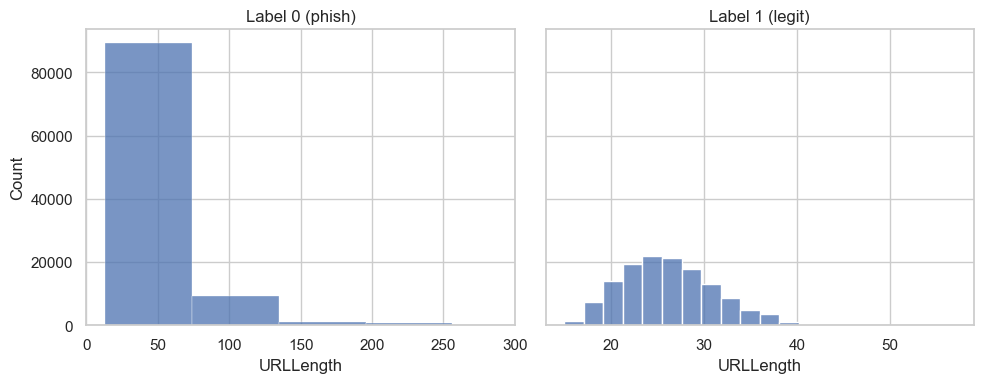

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='URLLength', hue='label', bins=50, kde=False, element='step')
plt.title('URL Length by Label (0=Phish, 1=legit)')
plt.xlim(0, 300)
plt.show()

df.groupby('label')['URLLength'].agg(['count','min','max','mean','median'])

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='URLLength', showfliers=False)
plt.ylim(0, 200)   # adjust upper limit until the box is readable
plt.title('URLLength by label (outliers hidden)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# phishing
sns.histplot(df[df['label']==0]['URLLength'], bins=100, ax=axes[0])
axes[0].set_title('Label 0 (phish)')
axes[0].set_xlim(0, 300)   # zoom so bars are visible

# legit
legit = df[df['label']==1]['URLLength']
sns.histplot(legit, bins=20, ax=axes[1])
axes[1].set_title('Label 1 (legit)')
axes[1].set_xlim(legit.min()-2, legit.max()+2)

plt.tight_layout()
plt.show()

In [33]:
#correlation between
corr_with_label = df.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(corr_with_label.head(20))
print(corr_with_label.tail(20))

label                    1.000000
URLSimilarityIndex       0.860358
HasSocialNet             0.784255
HasCopyrightInfo         0.743358
HasDescription           0.690232
IsHTTPS                  0.609132
DomainTitleMatchScore    0.584905
HasSubmitButton          0.578561
IsResponsive             0.548608
URLTitleMatchScore       0.539419
HasHiddenFields          0.507731
HasFavicon               0.493711
URLCharProb              0.469749
CharContinuationRate     0.467735
HasTitle                 0.459725
Robots                   0.392620
NoOfJS                   0.373500
Pay                      0.359747
NoOfSelfRef              0.316211
NoOfImage                0.274658
Name: label, dtype: float64
NoOfSubDomain                -0.005955
NoOfObfuscatedChar           -0.015315
NoOfAmpersandInURL           -0.034622
LargestLineLength            -0.041111
ObfuscationRatio             -0.041915
NoOfURLRedirect              -0.046456
HasObfuscation               -0.052473
IsDomainIP         